In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
# load packages
import pandas as pd
import statsmodels.tsa.stattools as stats
import statsmodels.graphics.tsaplots as sg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import sys
from datetime import datetime
import numpy as np

import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

sys.path.append("../pipelines")
import Pipelines as tdw
data_folder = "/projects/p20519/roller_output/optimizing_window_size/RandomForest/insilico_size10_1/"

output_path = "/home/jjw036/Roller/insilico_size10_1"

current_time = datetime.now().strftime('%Y-%m-%d_%H:%M:%S')

data_folder = "../output/insilico_size10_1"
file_path = "../data/dream4/insilico_size10_1_timeseries.tsv"
run_params = {'data_folder': data_folder,
              'file_path':file_path,
              'td_window':10,
              'min_lag':1,
              'max_lag':3,
              'n_trees':10,
              'permutation_n':10,
              'lag_method':'mean_mean',
              'calc_mse':False,
              'bootstrap_n':1000,
              'n_trials':1,
              'run_time':current_time,
              'sort_by':'rank',
              'iterating_param':'td_window',
              }
            

roc,pr, tdr = tdw.get_td_stats(**run_params)

['Time', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10']
Running permutation on window 3...
Running permutation on window 4...
Running permutation on window 5...
Running permutation on window 6...
Running permutation on window 7...
Running permutation on window 8...
Running permutation on window 9...
Running permutation on window 10...
Running permutation on window 11...
Compiling all model edges...
[DONE]
Lumping edges...
[DONE]

/Users/jjw036/Roller/Swing/Swing.py:564: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  current_df.sort(['adj_imp'], ascending=False, inplace=True)
/Users/jjw036/Roller/Swing/Swing.py:690: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  sort_df.sort(sort_field, ascending=True, inplace=True)



Calculating rank edge importance...
[DONE]
90
Scoring model...
[DONE]
0.864
0.492906348675


In [4]:
## Loading baseline SWING results (uniform windowing)
edges = pd.read_csv("../data/dream4/insilico_size10_1_goldstandard.tsv",sep="\t",header=None)
edges = edges[edges[2] > 0]
edges=edges[edges.columns[0:2]]
edges = [tuple(x) for x in edges.values]

tdr.full_edge_list
#tdr.edge_dict
final_edge_list = tdr.make_sort_df(tdr.edge_dict, sort_by=run_params['sort_by'])
final_edge_list['Correct'] = final_edge_list['regulator-target'].isin(edges)
pd.set_option('display.height', 500)
final_edge_list

Calculating rank edge importance...
[DONE]
height has been deprecated.



/Users/jjw036/Roller/Swing/Swing.py:690: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  sort_df.sort(sort_field, ascending=True, inplace=True)


,regulator-target,rank_importance,Correct
0,"(G8, G6)",44.74074,True
1,"(G1, G5)",46.92593,True
2,"(G5, G1)",59.48148,False
3,"(G9, G10)",65.96296,True
4,"(G7, G3)",72.37037,True
5,"(G2, G6)",86.18519,False
6,"(G7, G2)",87.77778,False
7,"(G9, G3)",90.03704,False
8,"(G5, G10)",93.74074,False
9,"(G6, G8)",98.29630,False


In [5]:
## Identifying edges that are poorly detected
#Edge G2->G8, and G7->G4 

def get_experiment_list(filename):
    # load files
    timecourse = pd.read_csv(filename, sep="\t")
    # divide into list of dataframes
    experiments = []
    for i in range(0,85,21):
        experiments.append(timecourse.ix[i:i+20])
    
    #reformat
    for idx,exp in enumerate(experiments):
        exp = exp.set_index('Time')
        experiments[idx]=exp
    return(experiments)

experiments=get_experiment_list("../data/dream4/insilico_size10_1_timeseries.tsv")
# formatting matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)


/Users/jjw036/anaconda/lib/python3.4/site-packages/pandas/tools/plotting.py:929: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


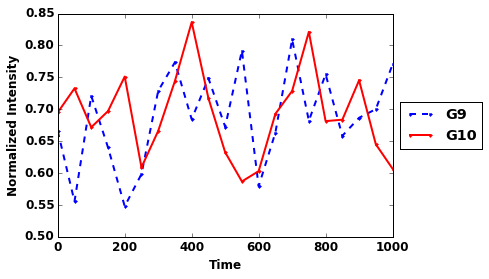

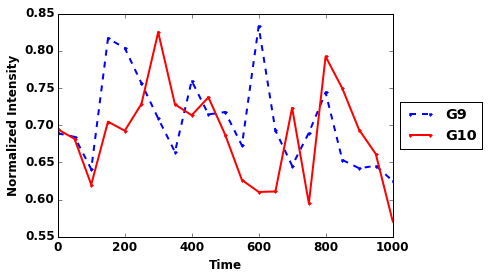

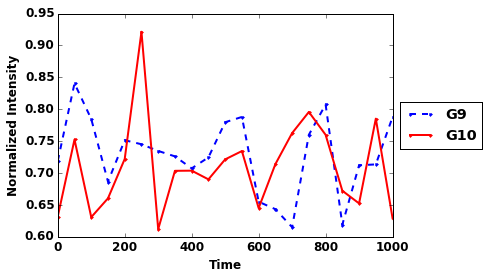

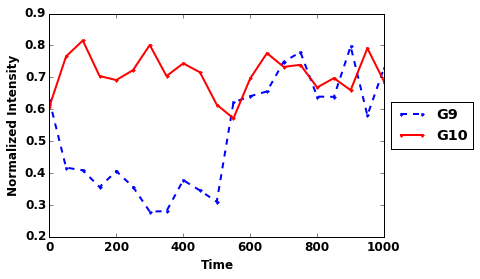

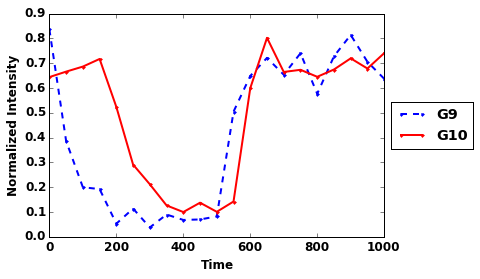

In [76]:

# plot time series for an interaction
fig = plt.figure(figsize=(8,15))

G1 = 'G9'
G2 = 'G10'

for index,experiment in enumerate(experiments):
    ax1 = experiments[index][[G1, G2]].plot(linewidth=2, colors=['blue','red'], style=['.--','.-'])
    ax1.set_ylabel('Normalized Intensity', fontweight='bold')
    ax1.set_xlabel('Time',fontweight='bold')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


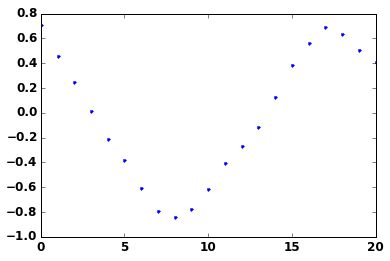

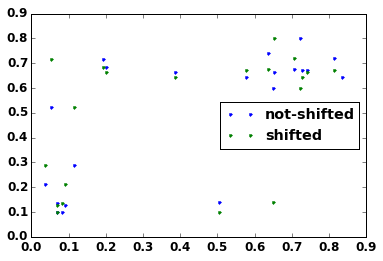

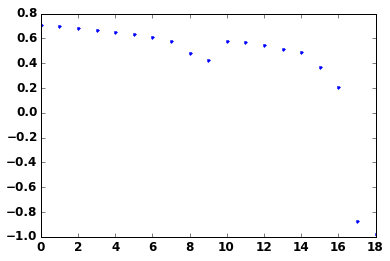

In [158]:
def plot_ccf(exp,experiments, var1, var2):
    ccf = stats.ccf(experiments[exp][var1], experiments[exp][var2])
    return(ccf)

ccf_list = [plot_ccf(i, experiments, 'G9','G10') for i in range(0,5)]

ccf_array = np.array(ccf_list)

mean_array = ccf_array.mean(axis = 0)

#plt.plot(mean_array,'.',linewidth=2, label=i)

# for i in range(0,5):    
#      ccf=plot_ccf(i,experiments, 'G9','G10')
#      plt.plot(ccf,'.',linewidth=2, label=i)
#      plt.legend(loc='best')
ccf=plot_ccf(4,experiments, 'G9','G10')
plt.plot(ccf,'.',linewidth=2, label=i)
# len(ccf)
plt.figure()
item1 = experiments[4]['G9']
item2 = experiments[4]['G10']
item2_shifted = experiments[4]['G10'].shift(1)

plt.plot(item1,item2, '.', label = 'not-shifted')
plt.plot(item1,item2_shifted , '.', label = 'shifted')
plt.legend(loc = 'best')

shifted_list=[item2.shift(i) for i in range(0, len(item2)-1)]
#print("shifted list", shifted_list)

pearson_cc = []
pvalue_cc = []
for i in range(0,len(shifted_list)-1):
    print(i)
    shifted_item =shifted_list[i][~pd.isnull(shifted_list[i])]
    censored_item = item1[:len(shifted_item),]

    rr, p_value = scipy.stats.pearsonr( shifted_item, censored_item)
    pearson_cc.append(rr)
    pvalue_cc.append(p_value)

plt.figure()
plt.plot(pearson_cc, '.')

# 1)preprocessing steps before inference:
# identify inactive genes in each experiment
# make new array of inactive genes (using a matrix)
# when regressing explanatory variables, remove genes/timepoints that are labeled as inactive

# 2) CCF as a lag selection method
# pick order, create cost function to select lag order


# combining ccf for separate experiments?




In [40]:
## Dissecting window results
for target_window in tdr.window_list:

    current_df = target_window.make_edge_table(calc_mse=False)
    current_df['adj_imp'] = np.abs(current_df['Importance']*(1-current_df['p_value']))
    current_df.sort(['adj_imp'], ascending=False,inplace=True)
    print(current_df[(current_df['Parent']=='G7') & (current_df['Child']=='G2')])

   Parent Child  Importance  P_window  C_window  p_value  adj_imp
46     G7    G2     0.12973         1         3  0.00125  0.12956
56     G7    G2     0.12513         2         3  0.00012  0.12511
36     G7    G2     0.00537         0         3  0.29334  0.00379
   Parent Child  Importance  P_window  C_window  p_value  adj_imp
56     G7    G2     0.15941         3         4  0.00000  0.15941
46     G7    G2     0.02320         2         4  0.80804  0.00445
36     G7    G2     0.00480         1         4  0.14533  0.00411
   Parent Child  Importance  P_window  C_window  p_value  adj_imp
36     G7    G2     0.11332         2         5  0.01785  0.11130
56     G7    G2     0.09284         4         5  0.13519  0.08029
46     G7    G2     0.01322         3         5  0.60985  0.00516
   Parent Child  Importance  P_window  C_window  p_value  adj_imp
56     G7    G2     0.11475         5         6  0.00035  0.11471
46     G7    G2     0.10962         4         6  0.01254  0.10825
36     G7 

/Users/jjw036/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
